# **Import Library**

In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
import tensorflow as tf

# **Load Model**

In [2]:
from google.colab import files
uploaded = files.upload()

Saving my_model.zip to my_model.zip


In [3]:
import zipfile

with zipfile.ZipFile("my_model.zip", 'r') as zip_ref:
    zip_ref.extractall("my_model")

In [4]:
import keras
import tensorflow as tf
from keras.layers import TFSMLayer
from keras.models import Sequential
from keras.layers import Input

layer = TFSMLayer("my_model", call_endpoint="serving_default")

model = Sequential([
    Input(shape=(150, 150, 3)),
    layer
])

In [5]:
imported = tf.saved_model.load('my_model')
print(list(imported.signatures['serving_default'].structured_outputs.keys()))

['output_0']


# **Inference Test**

In [6]:
from tensorflow.keras.preprocessing import image
import numpy as np

def preprocess_image(img_path, target_size=(150, 150)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0  # Normalisasi [0, 1] (sesuai training)
    img_array = np.expand_dims(img_array, axis=0)  # Tambahkan batch dimension
    return img_array

Saving 10059.jpg to 10059.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
Predicted: forest (Confidence: 0.73)
All class probabilities:
- buildings: 0.0015
- forest: 0.7252
- glacier: 0.0019
- mountain: 0.0003
- sea: 0.0000
- street: 0.2711


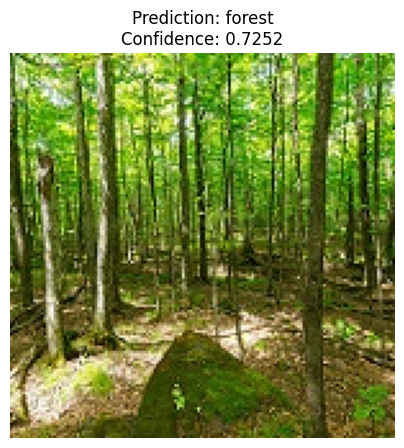

In [10]:
from google.colab import files
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Define class labels before usage
class_labels = ["buildings", "forest", "glacier", "mountain", "sea", "street"]

# Upload gambar
uploaded = files.upload()
img_path = list(uploaded.keys())[0]  # Ambil nama file

# Preprocess gambar (make sure you have preprocess_image function defined)
img = Image.open(img_path)
img_processed = preprocess_image(img_path)

# 1. Lakukan prediksi
prediction = model.predict(img_processed)

# 2. Handle different prediction output formats
if isinstance(prediction, dict):
    # If prediction is a dictionary, find the key containing probabilities
    # Common keys: 'predictions', 'probabilities', 'output_0', etc.
    for key in prediction.keys():
        if prediction[key].shape[1] == len(class_labels):  # Check if shape matches number of classes
            class_probs = prediction[key][0]
            break
else:
    # If prediction is numpy array
    class_probs = prediction[0]

# 3. Ambil indeks kelas dengan probabilitas tertinggi
predicted_class_idx = np.argmax(class_probs)

# 4. Dapatkan label dan confidence score
predicted_label = class_labels[predicted_class_idx]
confidence = np.max(class_probs)

print(f"Predicted: {predicted_label} (Confidence: {confidence:.2f})")
print("All class probabilities:")
for label, prob in zip(class_labels, class_probs):
    print(f"- {label}: {prob:.4f}")

# Tampilkan gambar dan hasil
plt.figure(figsize=(5, 5))
plt.imshow(img)
plt.title(f"Prediction: {predicted_label}\nConfidence: {confidence:.4f}", fontsize=12)
plt.axis('off')
plt.show()


Saving aug_image_90.jpg to aug_image_90.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
Predicted: street (Confidence: 0.73)
All class probabilities:
- buildings: 0.2040
- forest: 0.0476
- glacier: 0.0109
- mountain: 0.0052
- sea: 0.0002
- street: 0.7321


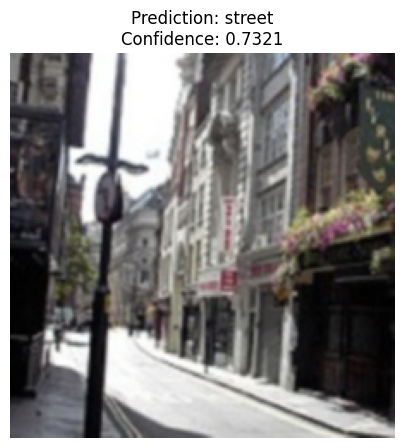

In [16]:
from google.colab import files
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Define class labels before usage
class_labels = ["buildings", "forest", "glacier", "mountain", "sea", "street"]

# Upload gambar
uploaded = files.upload()
img_path = list(uploaded.keys())[0]  # Ambil nama file

# Preprocess gambar (make sure you have preprocess_image function defined)
img = Image.open(img_path)
img_processed = preprocess_image(img_path)

# 1. Lakukan prediksi
prediction = model.predict(img_processed)

# 2. Handle different prediction output formats
if isinstance(prediction, dict):
    # If prediction is a dictionary, find the key containing probabilities
    # Common keys: 'predictions', 'probabilities', 'output_0', etc.
    for key in prediction.keys():
        if prediction[key].shape[1] == len(class_labels):  # Check if shape matches number of classes
            class_probs = prediction[key][0]
            break
else:
    # If prediction is numpy array
    class_probs = prediction[0]

# 3. Ambil indeks kelas dengan probabilitas tertinggi
predicted_class_idx = np.argmax(class_probs)

# 4. Dapatkan label dan confidence score
predicted_label = class_labels[predicted_class_idx]
confidence = np.max(class_probs)

print(f"Predicted: {predicted_label} (Confidence: {confidence:.2f})")
print("All class probabilities:")
for label, prob in zip(class_labels, class_probs):
    print(f"- {label}: {prob:.4f}")

# Tampilkan gambar dan hasil
plt.figure(figsize=(5, 5))
plt.imshow(img)
plt.title(f"Prediction: {predicted_label}\nConfidence: {confidence:.4f}", fontsize=12)
plt.axis('off')
plt.show()


Saving 10079.jpg to 10079.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Predicted: street (Confidence: 0.81)
All class probabilities:
- buildings: 0.1257
- forest: 0.0568
- glacier: 0.0063
- mountain: 0.0022
- sea: 0.0000
- street: 0.8089


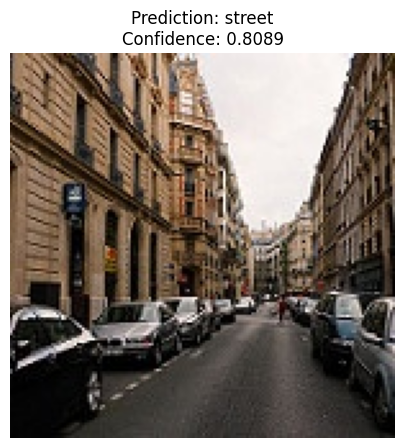

In [25]:
from google.colab import files
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Define class labels before usage
class_labels = ["buildings", "forest", "glacier", "mountain", "sea", "street"]

# Upload gambar
uploaded = files.upload()
img_path = list(uploaded.keys())[0]  # Ambil nama file

# Preprocess gambar (make sure you have preprocess_image function defined)
img = Image.open(img_path)
img_processed = preprocess_image(img_path)

# 1. Lakukan prediksi
prediction = model.predict(img_processed)

# 2. Handle different prediction output formats
if isinstance(prediction, dict):
    # If prediction is a dictionary, find the key containing probabilities
    # Common keys: 'predictions', 'probabilities', 'output_0', etc.
    for key in prediction.keys():
        if prediction[key].shape[1] == len(class_labels):  # Check if shape matches number of classes
            class_probs = prediction[key][0]
            break
else:
    # If prediction is numpy array
    class_probs = prediction[0]

# 3. Ambil indeks kelas dengan probabilitas tertinggi
predicted_class_idx = np.argmax(class_probs)

# 4. Dapatkan label dan confidence score
predicted_label = class_labels[predicted_class_idx]
confidence = np.max(class_probs)

print(f"Predicted: {predicted_label} (Confidence: {confidence:.2f})")
print("All class probabilities:")
for label, prob in zip(class_labels, class_probs):
    print(f"- {label}: {prob:.4f}")

# Tampilkan gambar dan hasil
plt.figure(figsize=(5, 5))
plt.imshow(img)
plt.title(f"Prediction: {predicted_label}\nConfidence: {confidence:.4f}", fontsize=12)
plt.axis('off')
plt.show()
